# Calculate MUR25 Sea Surface Temperature Global Mean

This notebook demonstrates how we calculate the area-weighted global mean sea surface temperature (SST) from the MUR25 L4 dataset. 

You can run this on a local computer by downloading the data using the following command in your terminal:
    
    podaac-data-downloader -c MUR25-JPL-L4-GLOB-v04.2 -d ./data/MUR25-JPL-L4-GLOB-v04.2 --start-date 2022-12-01T00:00:00Z --end-date 2022-12-31T23:00:00Z

### Load required libraries and prepare data

In [2]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
from datetime import date
import pandas as pd


### Process Dataset 1: MUR 25

In [3]:
ds = xr.load_dataset('~/data/MUR25-JPL-L4-GLOB-v04.2/20221201090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc')

ds

<xarray.Dataset>
Dimensions:           (time: 1, lat: 720, lon: 1440)
Coordinates:
  * time              (time) datetime64[ns] 2022-12-01T09:00:00
  * lat               (lat) float32 -89.88 -89.62 -89.38 ... 89.38 89.62 89.88
  * lon               (lon) float32 -179.9 -179.6 -179.4 ... 179.4 179.6 179.9
Data variables:
    analysed_sst      (time, lat, lon) float32 nan nan nan ... 271.4 271.4 271.4
    analysis_error    (time, lat, lon) float32 nan nan nan ... 0.34 0.34 0.34
    mask              (time, lat, lon) float32 2.0 2.0 2.0 2.0 ... 9.0 9.0 9.0
    sea_ice_fraction  (time, lat, lon) float32 nan nan nan ... 0.97 0.97 0.97
    sst_anomaly       (time, lat, lon) float32 nan nan nan nan ... 0.0 0.0 0.0
Attributes: (12/54)
    Conventions:                CF-1.7, ACDD-1.3
    title:                      Daily 0.25-degree MUR SST, Final product
    summary:                    A low-resolution version of the MUR SST analy...
    keywords:                   Oceans > Ocean Temperature > Sea Surface Temp...
    keywords_vocabulary:        NASA Global Change Master Directory (GCMD) Sc...
    standard_name_vocabulary:   NetCDF Climate and Forecast (CF) Metadata Con...
    ...                         ...
    publisher_name:             GHRSST Project Office
    publisher_url:              https://www.ghrsst.org
    publisher_email:            gpc@ghrsst.org
    file_quality_level:         3
    metadata_link:              http://podaac.jpl.nasa.gov/ws/metadata/datase...
    acknowledgment:             Please acknowledge the use of these data with...

In [4]:
# select sst variable
sst = ds.analysed_sst
sst

<xarray.DataArray 'analysed_sst' (time: 1, lat: 720, lon: 1440)>
array([[[   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        ...,
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 2022-12-01T09:00:00
  * lat      (lat) float32 -89.88 -89.62 -89.38 -89.12 ... 89.38 89.62 89.88
  * lon      (lon) float32 -179.9 -179.6 -179.4 -179.1 ... 179.4 179.6 179.9
Attributes:
    long_name:              analysed sea surface temperature
    standard_name:          sea_surface_foundation_temperature
    coverage_content_type:  physicalMeasurement
    units:                  kelvin
    valid_min:              -32767
    valid_max:              32767
    comment:                "Final" version using Multi-Resolution Variationa...
    source:                 MODIS_T-JPL, MODIS_A-JPL, AMSR2-REMSS, AVHRRMTB_G...

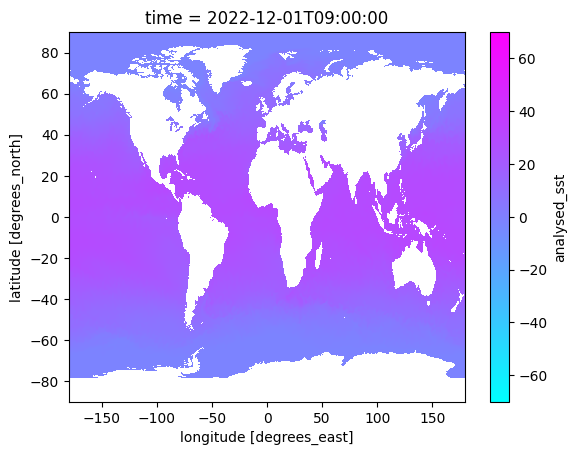

In [5]:
ds = xr.load_dataset('~/data/MUR25-JPL-L4-GLOB-v04.2/20221201090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc')

# select sst variable
sst = ds.analysed_sst

# convert to degrees Celcius
sst = sst - 273.15

# only select every 100th point
#sst = sst[0, ::20, ::20]
sst = sst[0,:,:]

db_items = {}

'''
for lat in sst.lat.values:
    for lon in sst.lon.values:
        
        db_entry = {
            "time": sst.time.values,
            "lat": lat,
            "lon": lon,
            "sst": sst.loc[dict(lat=lat, lon=lon)].values
        }

        db_items[sst.time.values] = db_entry
'''
# plot the data
p = sst.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), vmin=-70, vmax=70, cmap=plt.cm.cool)


### Analyze second granule - December 10

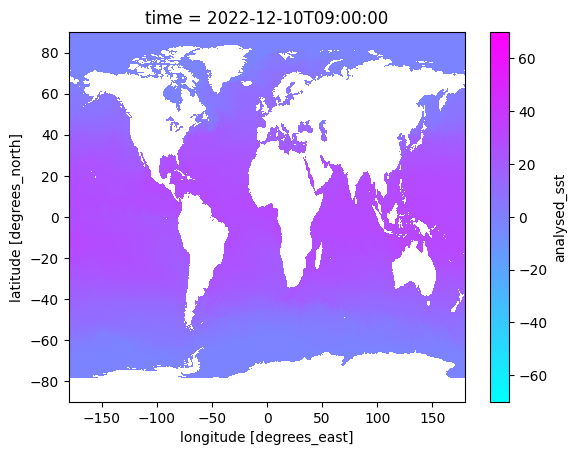

In [6]:
ds2= xr.load_dataset('~/data/MUR25-JPL-L4-GLOB-v04.2/20221210090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc')

# select sst variable
sst2 = ds2.analysed_sst

# convert to degrees Celcius
sst2 = sst2 - 273.15

# only select every 100th point
#sst2 = sst2[0, ::20, ::20]
sst2 = sst2[0, :, :]


# plot the data
p2 = sst2.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), vmin=-70, vmax=70, cmap=plt.cm.cool)


### Analyze 3rd granule - Dec 20

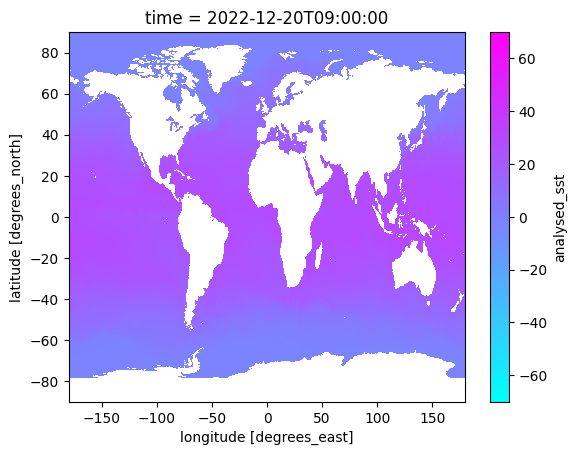

In [7]:
ds3= xr.load_dataset('~/data/MUR25-JPL-L4-GLOB-v04.2/20221220090000-JPL-L4_GHRSST-SSTfnd-MUR25-GLOB-v02.0-fv04.2.nc')

# select sst variable
sst3 = ds3.analysed_sst

# convert to degrees Celcius
sst3 = sst3 - 273.15

# only select every 100th point
#sst3 = sst3[0, ::20, ::20]
sst3 = sst3[0, :, :]


# plot the data
p3 = sst3.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), vmin=-70, vmax=70, cmap=plt.cm.cool)

### Calculate Statistics

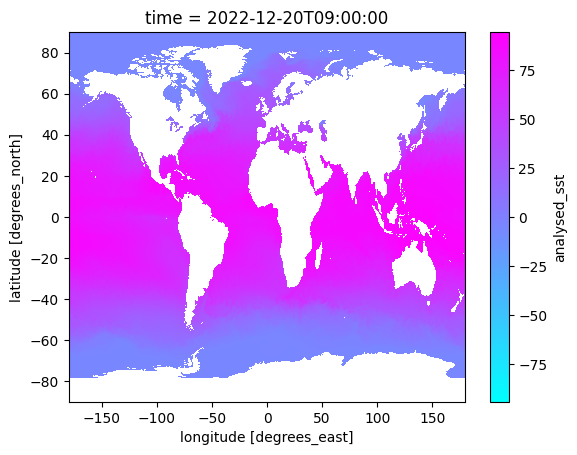

In [8]:
pixel_sum = sst + sst2 + sst3

plot_sum = pixel_sum.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)

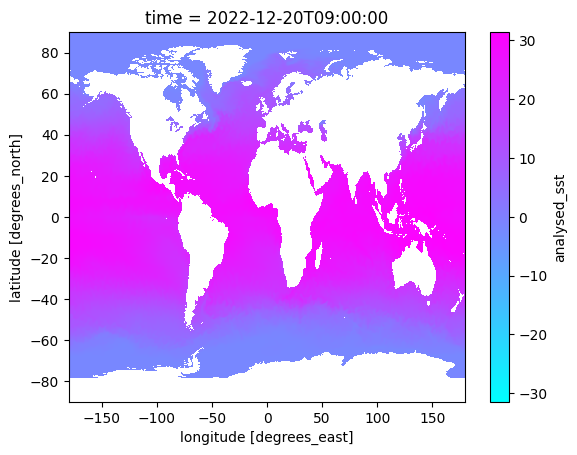

In [9]:
pixel_mean = (sst + sst2 + sst3)/3

pixel_mean.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)

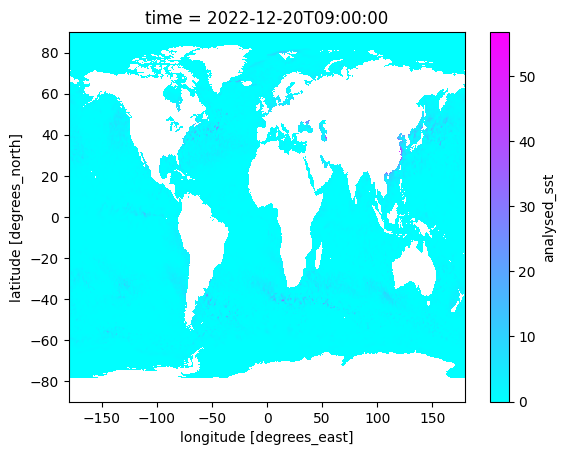

In [10]:
# sum of squares
pixel_sum_squares = (sst-pixel_mean)**2 + (sst2-pixel_mean)**2 + (sst3-pixel_mean)**2

plot_sum_sq = pixel_sum_squares.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)

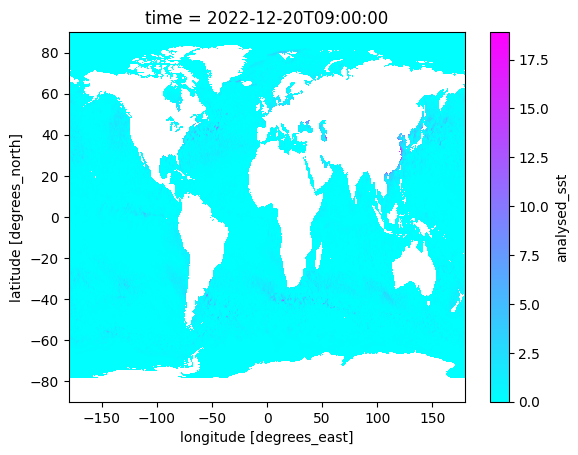

In [11]:
# Variance
pixel_variance = pixel_sum_squares/3

plot_variance = pixel_variance.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)

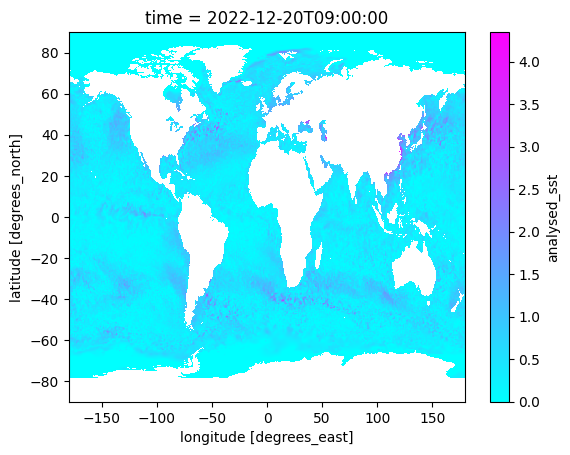

In [12]:
# standard deviation
pixel_sd = np.sqrt(pixel_variance)

plot_sd = pixel_sd.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)

# AVHRR OI from NCEI

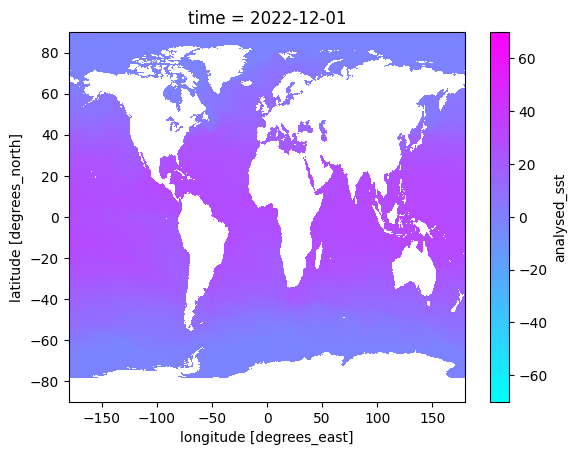

In [13]:
ads= xr.load_dataset('~/data/AVHRR_OI-NCEI-L4-GLOB-v2.1/20221201120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc')

# select sst variable
asst = ads.analysed_sst

# convert to degrees Celcius
asst = asst - 273.15

# only select every 100th point
#sst3 = sst3[0, ::20, ::20]
asst = asst[0, :, :]


# plot the data
ap = asst.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), vmin=-70, vmax=70, cmap=plt.cm.cool)

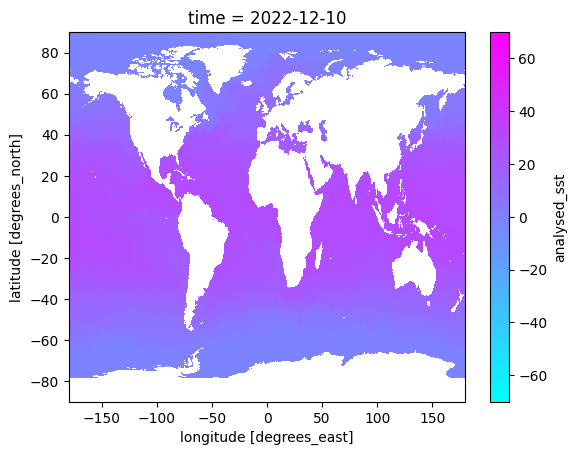

In [14]:
ads2= xr.load_dataset('~/data/AVHRR_OI-NCEI-L4-GLOB-v2.1/20221210120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc')

# select sst variable
asst2 = ads2.analysed_sst

# convert to degrees Celcius
asst2 = asst2 - 273.15

# only select every 100th point
#sst3 = sst3[0, ::20, ::20]
asst2 = asst2[0, :, :]


# plot the data
ap2 = asst2.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), vmin=-70, vmax=70, cmap=plt.cm.cool)

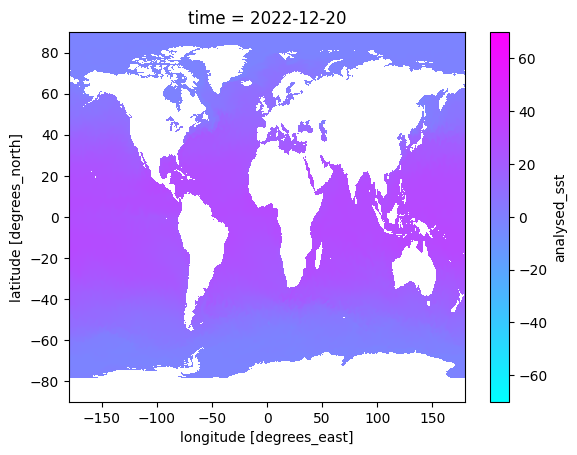

In [15]:
ads3= xr.load_dataset('~/data/AVHRR_OI-NCEI-L4-GLOB-v2.1/20221220120000-NCEI-L4_GHRSST-SSTblend-AVHRR_OI-GLOB-v02.0-fv02.1.nc')

# select sst variable
asst3 = ads3.analysed_sst

# convert to degrees Celcius
asst3 = asst3 - 273.15

# only select every 100th point
#sst3 = sst3[0, ::20, ::20]
asst3 = asst3[0, :, :]


# plot the data
ap3 = asst3.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), vmin=-70, vmax=70, cmap=plt.cm.cool)

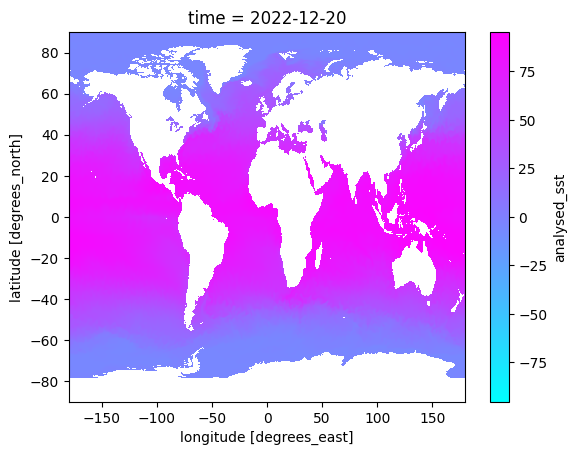

In [16]:
apixel_sum = asst + asst2 + asst3

aplot_sum = apixel_sum.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)

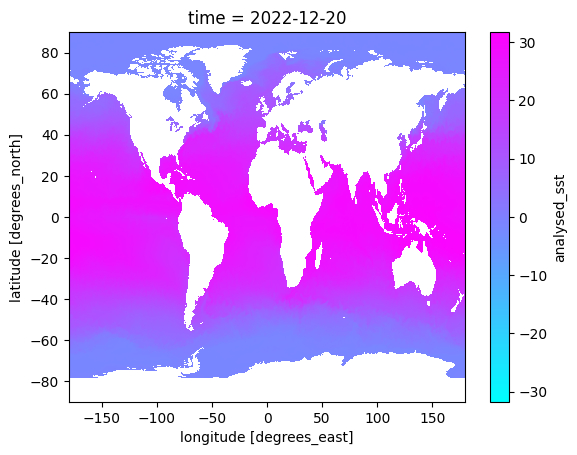

In [17]:
apixel_mean = (asst + asst2 + asst3)/3

apixel_mean.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)

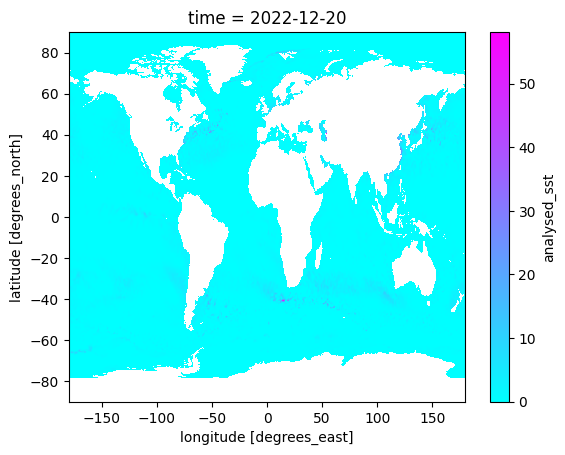

In [18]:
# sum of squares
apixel_sum_squares = (asst-apixel_mean)**2 + (asst2-apixel_mean)**2 + (asst3-apixel_mean)**2

aplot_sum_sq = apixel_sum_squares.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)

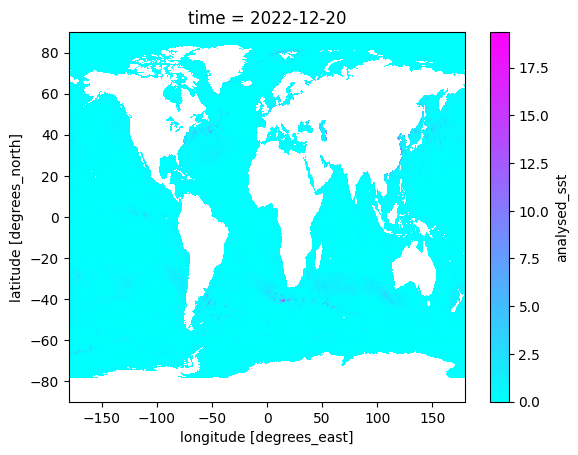

In [19]:
# Variance
apixel_variance = apixel_sum_squares/3

aplot_variance = apixel_variance.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)

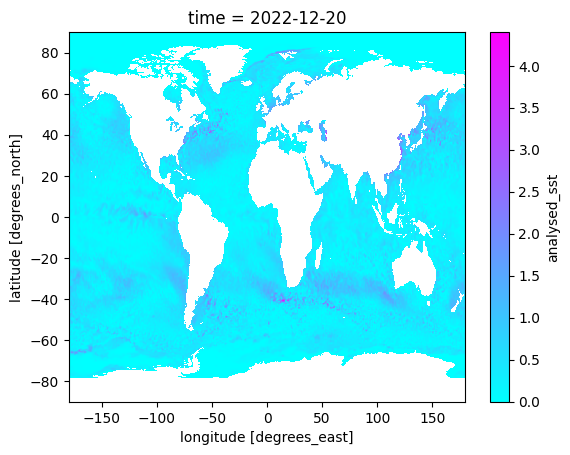

In [20]:
# standard deviation
apixel_sd = np.sqrt(apixel_variance)

aplot_sd = apixel_sd.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.cool)

# Intercomparison

Text(0.5, 1.0, 'Difference in Standard Deviation between AVHRR-OI and MUR25')

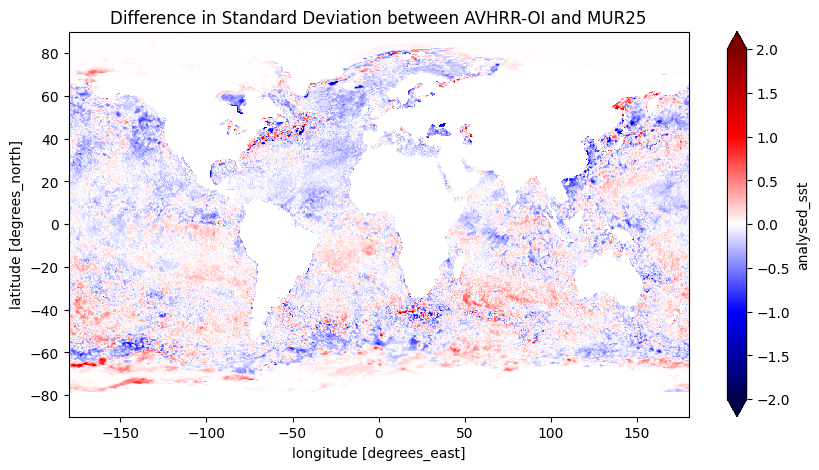

In [27]:
# standard deviation
inter_sd = np.sqrt(apixel_variance) - np.sqrt(pixel_variance)

iplot_sd = inter_sd.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.seismic, aspect=2, size=5, vmin=-2, vmax=2)

plt.title('Difference in Standard Deviation between AVHRR-OI and MUR25')

Text(0.5, 1.0, 'Difference in Variance between AVHRR-OI and MUR25')

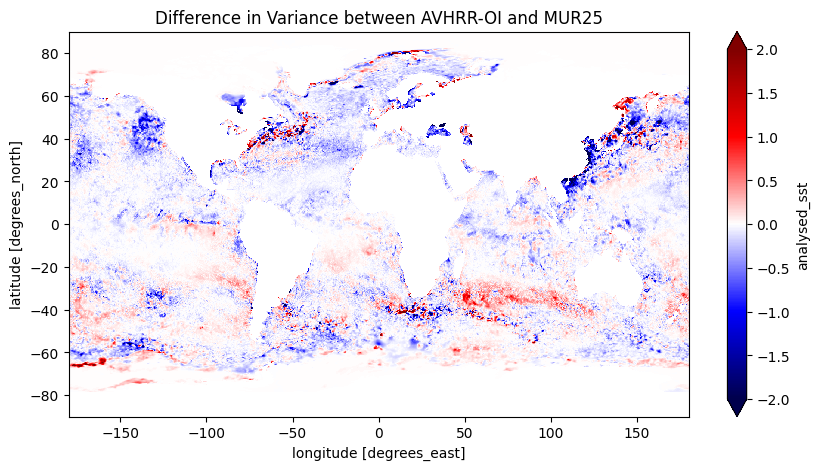

In [29]:
# Variance
ipixel_variance = apixel_sum_squares/3 - pixel_sum_squares/3

iplot_variance = ipixel_variance.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.seismic, aspect=2, size=5, vmin=-2, vmax=2)


plt.title('Difference in Variance between AVHRR-OI and MUR25')

Text(0.5, 1.0, 'Difference in Mean between AVHRR-OI and MUR25')

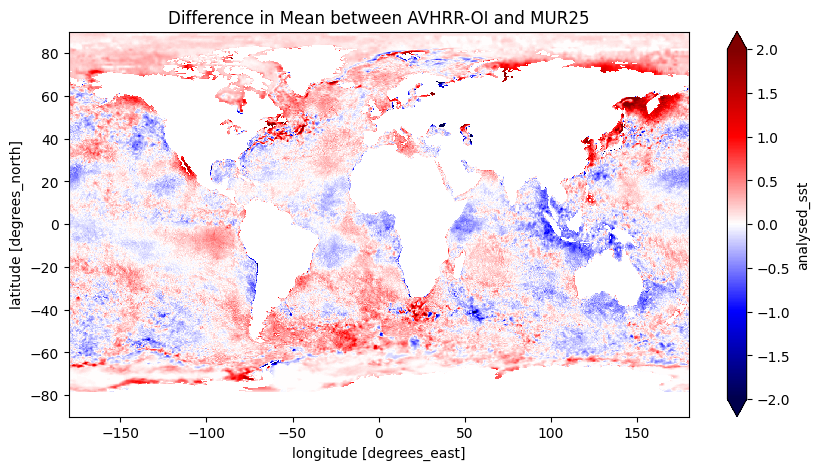

In [30]:
ipixel_mean = (asst + asst2 + asst3)/3 - (sst + sst2 + sst3)/3


iplot_mean = ipixel_mean.plot(subplot_kws=dict(transform=ccrs.PlateCarree()), cmap=plt.cm.seismic, aspect=3, size=5, vmin=-2, vmax=2)


plt.title('Difference in Mean between AVHRR-OI and MUR25')